<a href="https://colab.research.google.com/github/codecakes/ud_students_data_analysis/blob/master/ud_intro_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import datetime as dt
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
%config IPCompleter.greedy=True


In [0]:
import io

data = '''Admit,Gender,Dept,Freq
Admitted,Male,A,512
Rejected,Male,A,313
Admitted,Female,A,89
Rejected,Female,A,19
Admitted,Male,B,353
Rejected,Male,B,207
Admitted,Female,B,17
Rejected,Female,B,8
Admitted,Male,C,120
Rejected,Male,C,205
Admitted,Female,C,202
Rejected,Female,C,391
Admitted,Male,D,138
Rejected,Male,D,279
Admitted,Female,D,131
Rejected,Female,D,244
Admitted,Male,E,53
Rejected,Male,E,138
Admitted,Female,E,94
Rejected,Female,E,299
Admitted,Male,F,22
Rejected,Male,F,351
Admitted,Female,F,24
Rejected,Female,F,317'''

f = io.TextIOWrapper(io.StringIO(data))

In [0]:
df = pd.read_csv(f.buffer, usecols=('Admit','Gender','Dept','Freq'), skiprows=0)
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


In [0]:
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']
males.shape, females.shape

((12, 4), (12, 4))

In [0]:
grp = df.groupby(by=['Gender', 'Admit'])

In [0]:
grp.size()

Gender  Admit   
Female  Admitted    6
        Rejected    6
Male    Admitted    6
        Rejected    6
dtype: int64

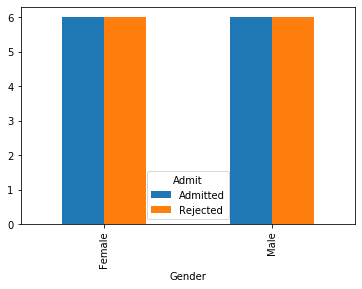

In [0]:
grp.size().unstack().plot.bar()

In [0]:
countries = [
             'Russian Fed.', 'Norway', 'Canada', 'United States',
             'Netherlands', 'Germany', 'Switzerland', 'Belarus',
             'Austria', 'France', 'Poland', 'China', 'Korea', 
             'Sweden', 'Czech Republic', 'Slovenia', 'Japan',
             'Finland', 'Great Britain', 'Ukraine', 'Slovakia',
            'Italy', 'Latvia', 'Australia', 'Croatia', 'Kazakhstan'
            ]

gold = [13, 11, 10, 9, 8, 8, 6, 5, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
silver = [11, 5, 10, 7, 7, 6, 3, 0, 8, 4, 1, 4, 3, 7, 4, 2, 4, 3, 1, 0, 0, 2, 2, 2, 1, 0]
bronze = [9, 10, 5, 12, 9, 5, 2, 1, 5, 7, 1, 2, 2, 6, 2, 4, 3, 1, 2, 1, 0, 6, 2, 1, 0, 1]
    
olympic_medal_counts = {'country_name':countries,
                        'gold': pd.Series(gold),
                        'silver': pd.Series(silver),
                        'bronze': pd.Series(bronze)}


In [0]:
df = pd.DataFrame(olympic_medal_counts, columns = olympic_medal_counts.keys())

In [0]:
n, _ = df.shape

In [94]:
cols = ['gold', 'silver', 'bronze']
medals = df[cols]
countries_with_medals = pd.concat(
    (df['country_name'], medals[medals.apply(lambda x: x>1)]), axis=1).dropna(
        how='all', subset=cols).fillna(value=0, axis=0)
countries_with_medals[cols].apply(lambda x: np.sum(x)/float(n))

gold      3.615385
silver    3.615385
bronze    3.576923
dtype: float64

In [104]:
countries_with_medals.head(2)

,country_name,gold,silver,bronze
0,Russian Fed.,13.0,11.0,9.0
1,Norway,11.0,5.0,10.0


In [0]:
medals = df.iloc[:, 1:]
n, ncols = medals.shape
res = np.arange(n, dtype=np.float).reshape(n, 1)


In [0]:
points_array = np.array([[4, 2, 1]], dtype=np.float).transpose()
np.matmul(medals, points_array, out=res, dtype=np.float, casting='unsafe')
olympic_points_df = pd.concat(
    (df['country_name'], pd.DataFrame(points, dtype=np.float)), axis=1)

# Predicting Titanic Survivors

In [0]:
import os
import functools

root_path = '/content'
open_fn = functools.partial(os.path.join, root_path)
gender_f = 'gender_submission.csv'
test_f = 'test.csv'
train_f = 'train.csv'

with open(open_fn(gender_f), 'rb') as f:
  titanic = pd.read_csv(f)

with open(open_fn(test_f), 'rb') as f:
  test = pd.read_csv(f)

with open(open_fn(train_f), 'rb') as f:
  train = pd.read_csv(f)





In [179]:
titanic.shape, train.shape, test.shape

((418, 2), (891, 12), (418, 11))

In [181]:
titanic.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [182]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [183]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [0]:
name_df = train['Name'].str.split(pat=',', n=2, expand=True)
name_df.columns=['First Name', 'Last Name']
train = train.merge(name_df, how='outer', left_index=True, right_index=True, copy=False)

In [226]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)


In [272]:
train.shape

(891, 14)

In [0]:
grp = train.groupby(by=['Sex', 'Survived'])

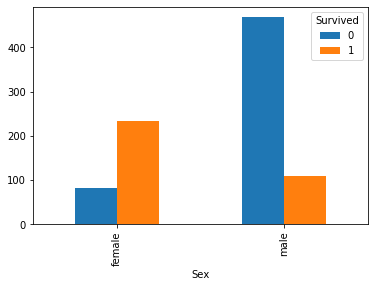

In [231]:
grp.size().unstack().plot.bar()

In [266]:
grp.size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


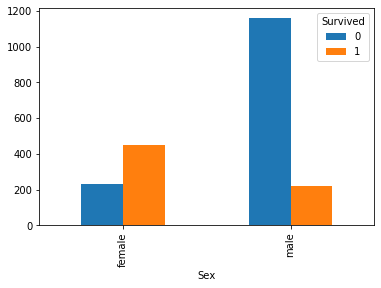

In [265]:
grp['Pclass'].agg(np.sum).unstack().plot.bar()

In [275]:
survived_stat = grp['Pclass'].count().unstack().agg(np.sum)

Survived
0    549
1    342
dtype: int64

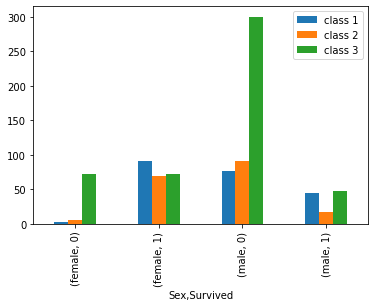

In [288]:
ax = grp['Pclass'].value_counts().unstack().plot.bar()
ax.legend(('class 1', 'class 2', 'class 3'))

In [289]:
grp['Pclass'].value_counts().unstack()

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47